In [ ]:
import os


os.chdir("../")


os.getcwd()


'd:\\DA_workspace\\plant_disease_classifier\\src'

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from classifier.Mylib import myfuncs
from classifier.constants import PARAMS_FILE_PATH


In [ ]:
params_file = myfuncs.read_yaml(f"../{PARAMS_FILE_PATH}")
image_size = params_file.image_size
batch_size = params_file.batch_size

image_size, batch_size


yaml file: ../params.yaml loaded successfully


(256, 32)

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Data/PlantVillageData",
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size,
)

class_names = dataset.class_names

class_names


Found 2152 files belonging to 3 classes.


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(-0.5, 255.5, 255.5, -0.5)

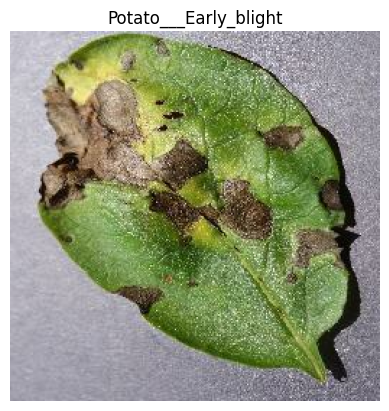

In [ ]:
image_batch, label_batch = next(iter(dataset.take(1)))
plt.title(class_names[label_batch[0]])
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.axis("off")


In [ ]:
train_ds, val_ds, test_ds = myfuncs.split_tfdataset_into_tranvaltest_1(dataset)

train_ds = myfuncs.cache_prefetch_tfdataset_2(train_ds)
val_ds = myfuncs.cache_prefetch_tfdataset_2(val_ds)
test_ds = myfuncs.cache_prefetch_tfdataset_2(test_ds)


In [ ]:
folder = "../artifacts/data_ingestion"

os.makedirs(folder, exist_ok=True)


(-0.5, 255.5, 255.5, -0.5)

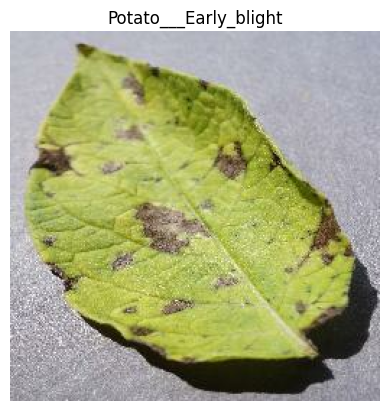

In [ ]:
train_ds.save(os.path.join(folder, "train_ds"))


In [ ]:
val_ds.save(os.path.join(folder, "val_ds"))
test_ds.save(os.path.join(folder, "test_ds"))
